In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [0]:
import math  

In [0]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [0]:
series = pd.read_csv('nifty_daily_volatility.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
Group.1
2013-01-01    0.038147
2013-01-02    0.007776
2013-01-03    0.004199
2013-01-04    0.004451
2013-01-07    0.004242
Name: x, dtype: float64


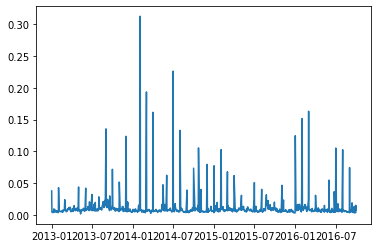

Group.1
2013-01-01    0.038147
2013-01-02    0.007776
2013-01-03    0.004199
2013-01-04    0.004451
2013-01-07    0.004242
Name: x, dtype: float64

In [0]:
pyplot.plot(series)
pyplot.show()
series['2013-01-01':'2013-01-07']

In [0]:
freq = 100*250*250 
cycle, trend = sm.tsa.filters.hpfilter(series, freq)


In [0]:
print(cycle)
print(trend)

Group.1
2013-01-01    0.030924
2013-01-02    0.000516
2013-01-03   -0.003098
2013-01-04   -0.002884
2013-01-07   -0.003129
                ...   
2016-09-26   -0.003676
2016-09-27   -0.002970
2016-09-28   -0.005608
2016-09-29    0.006087
2016-09-30   -0.001239
Name: x, Length: 925, dtype: float64
Group.1
2013-01-01    0.007224
2013-01-02    0.007261
2013-01-03    0.007298
2013-01-04    0.007335
2013-01-07    0.007372
                ...   
2016-09-26    0.009543
2016-09-27    0.009518
2016-09-28    0.009494
2016-09-29    0.009470
2016-09-30    0.009445
Name: x, Length: 925, dtype: float64


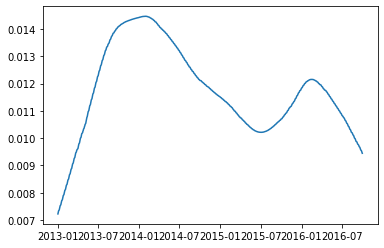

In [0]:
pyplot.plot(trend)
pyplot.show()

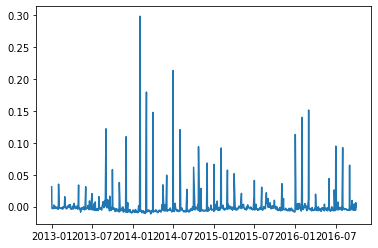

In [0]:
pyplot.plot(cycle)
pyplot.show()

In [0]:
X1 = cycle.values
#print(X1[920:925])
cycle_train, cycle_test = X1[0:875], X1[875:925]

cycle_train[0:5]
cycle_test[0:5]

array([-0.00432346, -0.00302405, -0.00205994, -0.00291007, -0.0044355 ])

In [0]:
def rmse_calc(a,b):
  l1 = len(a)
  l2 = len(b)
  print("l1 = ", l1)
  sqsm = 0
  for i in range(0, l1):
    t = abs(a[i]-b[i])
    tsqr = t*t
    sqsm = sqsm + tsqr
  sqsm = sqsm/l1
  r = math.sqrt(sqsm)
  return r


Lag: 21
Coefficients: [ 1.27008395e-05 -4.29745579e-02 -6.01756729e-02 -2.33142292e-02
 -3.56289805e-02 -5.36366455e-03 -1.99547426e-02 -3.48201721e-02
 -2.71870496e-02 -2.69465217e-02 -3.32872823e-02 -2.25141626e-02
 -1.43143983e-02 -3.73632280e-02 -3.78852463e-02 -3.36594333e-02
 -4.55430797e-02 -4.46805900e-02 -3.62091826e-02  1.46056877e-01
  5.58987353e-02  1.71966710e-01]
predicted=-0.002834, expected=-0.004323
predicted=-0.005318, expected=-0.003024
predicted=0.000665, expected=-0.002060
predicted=-0.001964, expected=-0.002910
predicted=0.000297, expected=-0.004436
predicted=-0.004766, expected=-0.000648
predicted=-0.003993, expected=-0.002944
predicted=0.014439, expected=-0.005781
predicted=0.005718, expected=0.092328
predicted=0.015553, expected=-0.003454
predicted=-0.001538, expected=-0.002835
predicted=-0.002412, expected=-0.002296
predicted=0.000689, expected=-0.001996
predicted=-0.000548, expected=-0.004704
predicted=0.000716, expected=-0.004389
predicted=-0.001750, expect

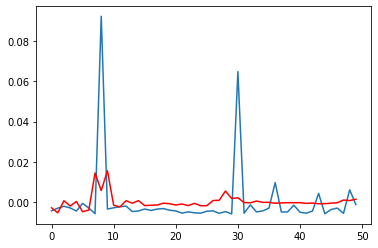

l1 =  50
0.016183741156421957


In [0]:
model1 = AR(cycle_train)
# AR.select_order(maxlag = 10,ic = 'aic',self = model1, method='mle', trend='c')
model1_fit = model1.fit()
print('Lag: %s' % model1_fit.k_ar)
print('Coefficients: %s' % model1_fit.params)
# make predictions
predictions = model1_fit.predict(start=len(cycle_train), end=len(cycle_train)+len(cycle_test)-1, dynamic=True)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], cycle_test[i]))
pyplot.plot(cycle_test)
pyplot.plot(predictions, color='red')
pyplot.show()
error = rmse_calc(predictions, cycle_test)
print(error)

In [0]:
cycle_train[0:5]
cycle_test

array([-0.00432346, -0.00302405, -0.00205994, -0.00291007, -0.0044355 ,
       -0.00064831, -0.00294421, -0.00578064,  0.09232762, -0.00345423,
       -0.00283483, -0.00229559, -0.00199624, -0.00470361, -0.00438878,
       -0.00343129, -0.00413589, -0.00347071, -0.00321898, -0.00403245,
       -0.00438964, -0.00548081, -0.0048456 , -0.0053159 , -0.00549894,
       -0.00455109, -0.00436459, -0.00557058, -0.00469607, -0.00587429,
        0.06481868, -0.0055414 , -0.00138339, -0.00489419, -0.0043695 ,
       -0.00303724,  0.00969288, -0.00492765, -0.0049007 , -0.0015343 ,
       -0.00503652, -0.00549223, -0.0044924 ,  0.00429596, -0.00582142,
       -0.00367613, -0.00297039, -0.00560798,  0.00608749, -0.00123929])

In [0]:
# # from pandas import read_csv
# # from matplotlib import pyplot
# # from statsmodels.tsa.ar_model import AR
# # from sklearn.metrics import mean_squared_error
# # split dataset
# # train autoregression
# model = AR(cycle_train)
# model_fit = model.fit()
# window = model_fit.k_ar
# coef = model_fit.params
# # walk forward over time steps in test
# history = cycle_train[len(cycle_train)-window:]
# history = [history[i] for i in range(len(history))]
# cycle_predictions = list()
# for t in range(len(cycle_test)):
# 	length = len(history)
# 	lag = [history[i] for i in range(length-window,length)]
# 	yhat = coef[0]
# 	for d in range(window):
# 		yhat += coef[d+1] * lag[window-d-1]
# 	obs = cycle_test[t]
# 	cycle_predictions.append(yhat)
# 	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
# error1 = mean_squared_error(cycle_test, cycle_predictions)
# error2 = rmse_calc(cycle_test, cycle_predictions)
# print("rmse: ", error1)
# print('Test MSE: %.3f' % error1)
# # plot
# pyplot.plot(cycle_test)
# pyplot.plot(cycle_predictions, color='red')
# pyplot.show()

In [0]:
X2 = trend.values
#X[0:5]
trend_train, trend_test = X2[0:875], X2[875:925]

trend_train[0:5]
trend_test[0:5]

array([0.01058991, 0.01056895, 0.01054785, 0.01052659, 0.01050518])

In [0]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [0]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [0]:
raw_seq = trend_train
n_steps = 3
X, y = split_sequence(raw_seq, n_steps)

In [0]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [0]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [0]:
model.fit(X, y, epochs=200, verbose=0)

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [0]:
trend_predictions = list()
pretest_input = trend_train[-3:]
test_input = pretest_input[-3:]

for i in range(len(trend_test)):
  test_input = test_input.reshape((1, n_steps, n_features))
  yhat = model.predict(test_input, verbose=0)
  trend_predictions.append(yhat[0][0])
  pretest_input = np.append(pretest_input, yhat)
  pretest_input = np.append(pretest_input,trend_train[-3-i-1])
  #np.append(pretest_input, yhat[0][0])
  #pretest_input.append(yhat[0][0])
  test_input = pretest_input[-3:]

In [0]:
trend_predictions
pretest_input

0.009469523787420366

In [0]:
for i in range(0,len(trend_predictions)):
  print('predicted=%f, expected=%f' % (trend_predictions[i], trend_test[i]))

predicted=0.010644, expected=0.010590
predicted=0.010656, expected=0.010569
predicted=0.010686, expected=0.010548
predicted=0.010709, expected=0.010527
predicted=0.010730, expected=0.010505
predicted=0.010750, expected=0.010484
predicted=0.010770, expected=0.010462
predicted=0.010789, expected=0.010440
predicted=0.010808, expected=0.010418
predicted=0.010827, expected=0.010396
predicted=0.010846, expected=0.010373
predicted=0.010865, expected=0.010351
predicted=0.010883, expected=0.010328
predicted=0.010901, expected=0.010306
predicted=0.010920, expected=0.010283
predicted=0.010938, expected=0.010260
predicted=0.010955, expected=0.010237
predicted=0.010973, expected=0.010214
predicted=0.010991, expected=0.010190
predicted=0.011008, expected=0.010167
predicted=0.011026, expected=0.010144
predicted=0.011043, expected=0.010120
predicted=0.011061, expected=0.010097
predicted=0.011078, expected=0.010073
predicted=0.011095, expected=0.010049
predicted=0.011112, expected=0.010026
predicted=0.

In [0]:
error3 = rmse_calc(trend_predictions, trend_test)
print("RMSE: ", error3)

l1 =  50
RMSE:  0.0012195734576184879


In [0]:
rvol_oberved = trend_test + cycle_test
len(rvol_forecast)
len(trend_predictions)
rvol_oberved[-6:]
# len(rvol_oberved)

array([0.00374553, 0.00586646, 0.00654784, 0.0038859 , 0.01555701,
       0.00820588])

In [0]:
series[-6:]

Group.1
2016-09-23    0.003746
2016-09-26    0.005866
2016-09-27    0.006548
2016-09-28    0.003886
2016-09-29    0.015557
2016-09-30    0.008206
Name: x, dtype: float64

In [0]:
rvol_forecast = list()
# rvol_oberved = list()
for i in range(0,len(trend_test)):
  t1 = trend_predictions[i] + predictions[i]
  rvol_forecast.append(t1)

len(rvol_forecast)

50

In [0]:
final_error = rmse_calc(rvol_forecast, rvol_oberved)
print("RMSE: ", final_error)

l1 =  50
RMSE:  0.016284715787641405


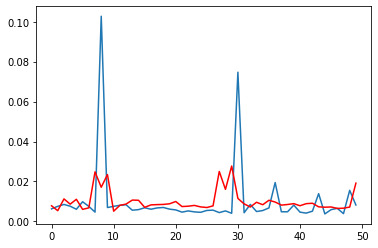

In [0]:
pyplot.plot(rvol_oberved)
pyplot.plot(rvol_forecast, color='red')
pyplot.show()